**Documentation for Week 4: Project Capstone**

This notebook was made to document the step-by-step of web scraping using BeautifulSoup as the first Capstone Project for the *Algoritma Academy Full Stack: Data Analytics Specialization* program

Version: 01 - January 2023

# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

In this project, we would like to produce a list of movies released in 2021 (with detailed information such as IMDB rating, Metascore, and votes), using legally available data from the IMDb website [here](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31), by utilizing a Python library named `BeautifulSoup` to scrape the information from our website. We will only limit our scraping to the first 6 pages, or correspond with 300 movies, from the IMDb 2021 movie list. We will then perform data analysis to find the 7 most popular movies.   

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [544]:
#importing necessary modules, packages,and libraries
import requests
from bs4 import BeautifulSoup 
import re # import regex/regular expression to process string match etc
import pandas as pd
import matplotlib.pyplot as plt

In [545]:
# Complete Data Scraping Process

title=[] # initiate tuple for movie title
ratings=[] # initiate tuple for viewer ratings
meta=[] # initiate tuple for metascore
votes_imdb=[] # initiate tuple for viewer votes
rank=7 #any number to perform subsetting of the Top <Rank> Movies

#request data from website for the first 300 data (or the first 6 pages)
for n in range(1, 252, 50):
    url_get=requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31&start=' + str(n) + '&ref_=adv_nxt')
    
    # Create BeautifulSoup object
    soup = BeautifulSoup(url_get.content,"html.parser")
    
    # Finding Key to scrap the data needed
    table = soup.find('div',attrs={'class':'lister-list'})
    
    # To find the row length for each page iteration 
    movie_list=table.find_all('div', attrs={'class':'lister-item mode-advanced'})
    row_length= len(movie_list)
    
    # Data scraping loop, based on row_length information, to get data from each page 
    for i in range(0, row_length):

        # Scraping the movie's name
        name = table.find_all('h3', attrs={'a':''})[i].get_text().strip()
        name_clean=re.findall('\n(.*)\n', name)  #using regex to cleance movie title from unwanted characters, resulted in series of lists
        title.append(name_clean[0]) # take only first element of each lists in the name_clean object 

        # Scraping the imdb ratings
        rate_imdb = table.find_all('strong')[i].get_text().strip()
        ratings.append(rate_imdb)  

        # Scraping metascores value, if any, otherwise return with None 
        if table.find_all('div', attrs={'class':'ratings-bar'})[i].find('span', class_ = 'metascore') is not None:
            m_score=table.find_all('div', attrs={'class':'ratings-bar'})[i].find('span', class_ = 'metascore').get_text().strip()
            meta.append(m_score)
        else:
            meta.append(0) #assign value 0 to movies with no metascore (for statistical purpose) 

        # Scraping voting result
        votes=table.find_all('p', attrs={'class':'sort-num_votes-visible'})[i].find('span', attrs = {'name':'nv'}).get_text().strip()
        votes_imdb.append(votes)

len(title), len(ratings), len(meta), len(votes_imdb) 

(300, 300, 300, 300)

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

 `url_get.content[1:500]`

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

`soup = BeautifulSoup(url_get.content,"html.parser")`

In [546]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

`table = soup.find('div',attrs={'class':'lister-list'})`

In [547]:
 print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt14821150">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt14821150/">
    <img alt="Vortex" class="loadlate" data-tconst="tt14821150" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjMxYTFmNTctNDgyYi00NzQwLTk1NTItMmVkYjk5Yjc1NmI2XkEyXkFqcGdeQXVyMTAyMjQ3NzQ1._V1_UY98_CR0,0,67,98_A


Finding row length.

`movie_list=table.find_all('div', attrs={'class':'lister-item mode-advanced'})`

`row_length= len(movie_list)`

Explanation of the scrapping process

Scraping Movie Title and rating using loop based on row_length with **for** operation

`for i in range(0, row_length):`

Scraping the movie's name with the following command : 

- `name = table.find_all('h3', attrs={'a':''})[i].get_text().strip()` to get only the text part and strip the unwanted spaces

- `name_clean=re.findall('\n(.*)\n', name)`  using regex library to cleance movie title from unwanted characters, which resulted in single-element-list

- `title.append(name_clean[0])` subset the first (and only) element `name_clean` object and append to the `title` array

Scraping the imdb ratings :

- `rate_imdb = table.find_all('strong')[i].get_text().strip()`

- `ratings.append(rate_imdb)`  append data from `rate_imdb` to the `ratings` array

Scraping metascores value, if any, otherwise return with None :

- First we declare the **if** statement and the condition to be satisfied.
`if table.find_all('div', attrs={'class':'ratings-bar'})[i].find('span', class_ = 'metascore') is not None:`

- `m_score=table.find_all('div', attrs={'class':'ratings-bar'})[i].find('span', class_ = 'metascore').get_text().strip()` Then, perform this chain of `find_all()` and `find()` operation to get the metascore values (if any).

- `meta.append(m_score)` to append data from `m_score` to the `meta` array

- Or perform the following operation if the **if** clause condition above not met

    `else:
     meta.append(0)`

We assign value 0 to movies with no metascore (to simplify the data visualization process)

Scraping voting result :

- Perform this chain of `find_all()` and `find()` operation to get the viewer votes. 
`votes=table.find_all('p', attrs={'class':'sort-num_votes-visible'})[i].find('span', attrs = {'name':'nv'}).get_text().strip()`

Because data extraction from the `sort-num_votes-visible` as parent (sometimes) results in 2 values, which are votes and gross revenue, we use `.find()` to extract only the first value we find, or in this case the viewer votes.

- `votes_imdb.append(votes)` to append data from `votes` to the `votes_imdb` array

Make sure that all of our lists are with the same length, which corresponds to the number of movies we scrapped from the web-site 

`len(title), len(ratings), len(meta), len(votes_imdb)` 

**(End of Scraping)**

## Creating data frame & Data wrangling

Put the array into dataframe

In [548]:
#creating data frame df from the resulting lists from the previous web-scraping processes
df = pd.DataFrame({'movie_title':title,
                    'movie_ratings':ratings,
                    'metascore':meta,
                    'votes':votes_imdb    
                    })
df

,movie_title,movie_ratings,metascore,votes
0,The White Lotus,7.9,0,"113,657"
1,1883,8.8,0,"73,986"
2,The Sex Lives of College Girls,7.8,0,"21,379"
3,Encanto,7.2,75,"223,027"
4,Firefly Lane,7.4,0,"24,943"
...,...,...,...,...
295,Kevin Can F**k Himself,7.0,0,"9,060"
296,Memoria,6.5,91,"8,744"
297,Katla,7.0,0,"14,283"
298,Once Upon a Time in Staten Island,5.4,0,722


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [549]:
#check data types
df.dtypes

movie_title      object
movie_ratings    object
metascore        object
votes            object
dtype: object

In [550]:
#to clean and change data type of column movie_ratings, metascore and votes
df['movie_ratings'] = df['movie_ratings'].astype('float64')
df['votes'] = df['votes'].str.replace(",","").astype('int64')
df['metascore'] = df['metascore'].astype('int64')
df.dtypes

movie_title       object
movie_ratings    float64
metascore          int64
votes              int64
dtype: object

In [566]:
#add column for metascore in scale of 1 to 10, for side to side comparison with viewer ratings later
max_meta=100 #maximum scale of metascore
max_ratings=10 #maximum scale of viewer ratings
df['meta_adj']=df['metascore']/max_meta*max_ratings
df.head()

,movie_ratings,metascore,votes,meta_adj
movie_title,,,,
The White Lotus,7.9,0,113657,0.0
1883,8.8,0,73986,0.0
The Sex Lives of College Girls,7.8,0,21379,0.0
Encanto,7.2,75,223027,7.5
Firefly Lane,7.4,0,24943,0.0


In [565]:
df = df.set_index('movie_title') #set movie_title as index

In [554]:
#to find 7 most popular movies based on movie ratings  
top7_ratings=df.sort_values(by='movie_ratings', ascending=False).head(rank).loc[:,['movie_ratings']]
top7_ratings

,movie_ratings
movie_title,
Clarkson's Farm,9.0
As If,9.0
Arcane,9.0
Jai Bhim,8.8
1883,8.8
It's a Sin,8.7
Invincible,8.7


In [555]:
#to find 7 most popular movies based on viewer votes  
top7_votes=df.sort_values(by='votes', ascending=False).head(rank).loc[:,['votes']]
top7_votes

,votes
movie_title,
Spider-Man: No Way Home,756388
Dune,636607
Don't Look Up,538708
Squid Game,448855
No Time to Die,402515
Zack Snyder's Justice League,399822
Shang-Chi and the Legend of the Ten Rings,383206


In [556]:
#to find 7 most popular movies based on movie critics (metascore)
top7_meta=df.sort_values(by='metascore', ascending=False).head(rank).loc[:,['metascore','meta_adj']]
top7_meta

,metascore,meta_adj
movie_title,,
Petite Maman,93,9.3
Memoria,91,9.1
Drive My Car,91,9.1
Hit the Road,90,9.0
The Worst Person in the World,90,9.0
Licorice Pizza,90,9.0
The Power of the Dog,89,8.9


## Data Visualization

In [558]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Top 7 Movies Based on Viewer Ratings'}, xlabel='Movie Title', ylabel='Viewer Ratings'>

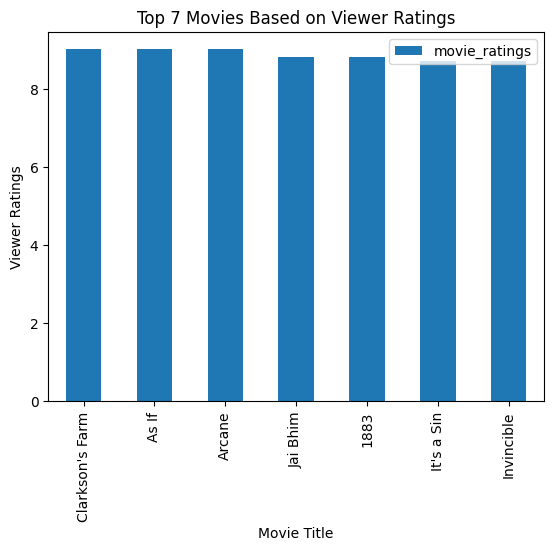

In [559]:
#Create barplot for to 7 movies based on rating
top7_ratings.plot(kind='bar', title="Top 7 Movies Based on Viewer Ratings",
                  xlabel='Movie Title', ylabel='Viewer Ratings')

<AxesSubplot:title={'center':'Top 7 Movies Based on Viewer Votes'}, xlabel='Movie Title', ylabel='Total Votes'>

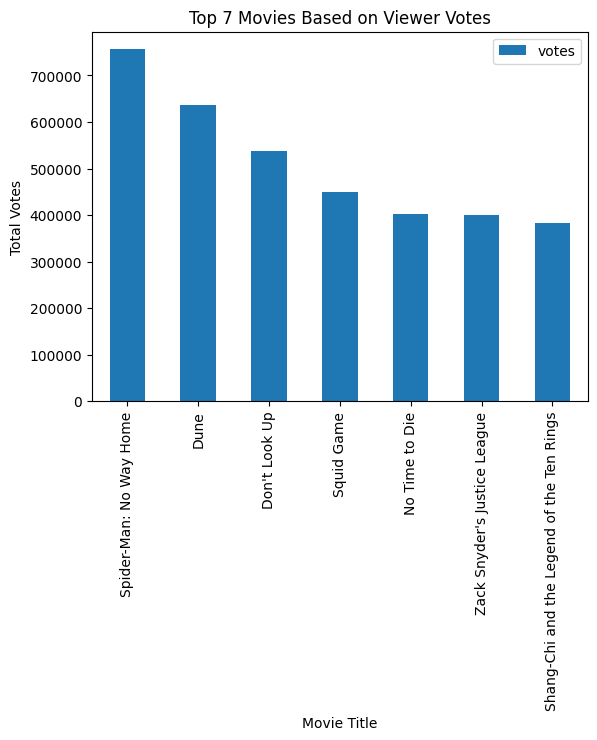

In [561]:
# Create barplot for to 7 movies based on viewer's votes
top7_votes.plot.bar(title="Top 7 Movies Based on Viewer Votes",
                  xlabel='Movie Title', ylabel='Total Votes')

<AxesSubplot:title={'center':'Top 7 Movies Based on Meta Critics (Metascore)'}, xlabel='Movie Title', ylabel='Metascore'>

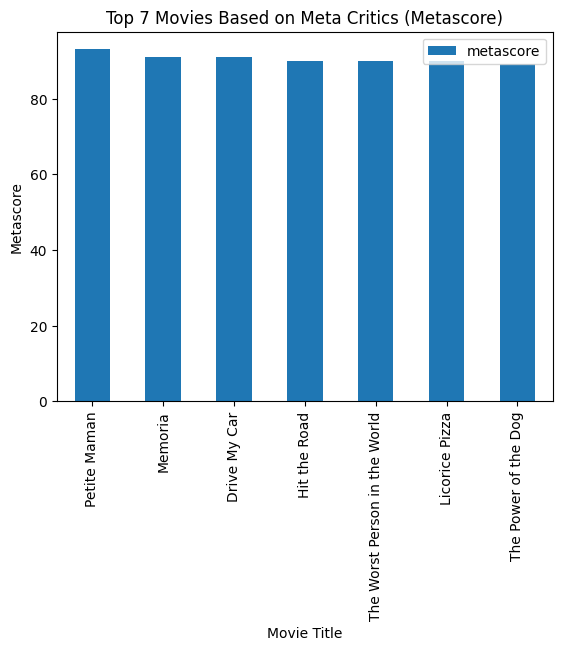

In [562]:
# Create barplot for to 7 movies based on metascore performance (movie critics)
top7_meta.plot.bar(y='metascore', title="Top 7 Movies Based on Meta Critics (Metascore)",
                  xlabel='Movie Title', ylabel='Metascore')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [593]:
#Comparison Table of 7 Top Movies on Each Category (Based on: Viewer Ratings, Votes, and Metascore)
top7=pd.DataFrame().assign(Top7_Ratings=top7_ratings.reset_index()['movie_title'],
                           Top7_Votes=top7_votes.reset_index()['movie_title'], Top7_Meta=top7_meta.reset_index()['movie_title'])

top7.shift()[1:] #rearrange index, starting from 1 instead of 0


,Top7_Ratings,Top7_Votes,Top7_Meta
1,Clarkson's Farm,Spider-Man: No Way Home,Petite Maman
2,As If,Dune,Memoria
3,Arcane,Don't Look Up,Drive My Car
4,Jai Bhim,Squid Game,Hit the Road
5,1883,No Time to Die,The Worst Person in the World
6,It's a Sin,Zack Snyder's Justice League,Licorice Pizza


Based on the result of our web-scraping process we try to create category of Top 7 Most Popular Movies in 2021 based on their viewer ratings, metascore (coming from reputable movie critics), and viewer votes. As you may see, each category results in different list of movies. Interestingly enough, there's no intersection of each category winners meaning that the most voted movies might not necesarrily the highest rating one nor with the highest metascore, and vice versa.

To understand the result above, we should first address how IMDb calculates the number of viewer ratings, votes and metascore. From the IMDb Help Center page
<a href="https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?ref_=helpsect_cons_2_4#">here</a>, movie ratings are aggregated of individual vote from IMDb registered users who cast a vote (from 1 to 10) on every released title in the database. The aggregated voted then summarized as a single IMDb rating, visible on the title's main page. But instead of using arithmetic mean/raw data average, IMDb uses **weighted average** for ratings displayed in the title bar.
Meaning that not all votes have the same impact (or 'weight') on the final rating, and we have less biased data. However, the total number of votes given are reflected in the **votes** info in the title main page, regardless how good/bad the votes was. <font color=red>Hence, the **votes** number are not necessarily reflecting the number of people in favour of/supporting the movies, or the movie was popular.</font>

While the **Metascores** are calculated based on the weighted average of many reviews coming from reputed critics. The Metacritic team reads the reviews and assigns each a 0–100 score, which is then given a weight, mainly based on the review’s quality and source, with weighting coefficients which are confidential. <font color=red>With that being said, the highest Metascore movies are not necessarily the most popular ones</font>.  

Although, IMDb provides information called **Popularity Ranking**, they do not disclose the calculation method for such data. 

To define how popular a movie is, we should think like IMDb (or other movie review platform) and define the weighted coefficients for our own **popularity index** by taking into consideration factors such as the viewer ratings, votes, and metascore (which unfortunately not all movies have it).

With the consideration mentioned above, the most relevant parameter left to rate movie's popularity is the **Viewer Rankings**. It reflects how a movie is well loved which contributes positively to it's popularity, although it may not the most voted one or score the highest metascore.

As we can see, the Top 7 Most Popular Movies in 2021 based on Viewer Ratings are :
- 1. Clarkson's Farm
- 2. As If
- 3. Arcane
- 4. Jai Bhim
- 5. 1883
- 6. It's a Sin
- 7. Invincible

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

### Additional Analysis

We perform additional analysis to the histogram plot of Viewer Ratings distribution for movies released in 2021. Before we continue the analysis, we could quantify the qualitative values of movies, with categories such as: Bad, Average, Good movies based on their viewer ratings. On a 0 to 10 scale, a bad movie is somewhere between 0 and 3, an average one between 3 and 7, and a good one between 7 and 10.

<AxesSubplot:title={'center':'Distribution of Viewer Ratings'}, ylabel='Frequency'>

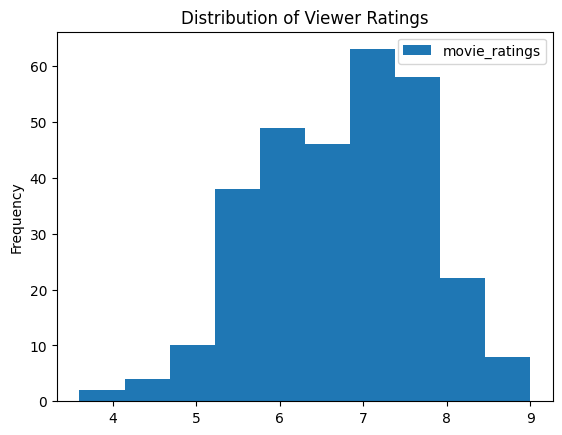

In [571]:
hist_ratings=df.copy().reset_index().loc[:,['movie_title','movie_ratings']]
hist_ratings.plot.hist(title='Distribution of Viewer Ratings', xlabel='Viewer Ratings', ylabel='#of movies')

In [600]:
df.copy().reset_index().loc[:,['movie_ratings']].describe()

,movie_ratings
count,300.000000
mean,6.759333
std,0.973673
min,3.600000
25%,6.100000
50%,6.900000
75%,7.400000
max,9.000000


**Analysis** : The Viewer Ratings histogram plot is not a symmetrical one, ratings are not evenly distributed, it is a Left-Skewed Normal Distribution, which mean it has much longer tail in the left side of the distribution. Therefore, you’ll find extreme values far from the peak on the low side more frequently than the high side. The skew indicates where you’ll find the majority of outliners. 
From the statistical summary of **movie_ratings** column using `.describe()`, the mean is notably less than the median,hence, we can not use mean in the calculation. It is suggested to use the median because it provides more robust statistic property in the presence of extreme values.

And base on our qualitative criteria, all of of our viewer ratings fall into the AVERAGE and GOOD brackets, with 7.4 as the most frequent rating appears (mode), bigger than it's median value of 6.9. This explains the characteristic of left-skewed normal distribution with mean < median < mode. 

<AxesSubplot:title={'center':'Top 7 Movies Based on Meta Critics (Metascore) with the Viewer Ratings'}, xlabel='Movie Title', ylabel='Rating/Score'>

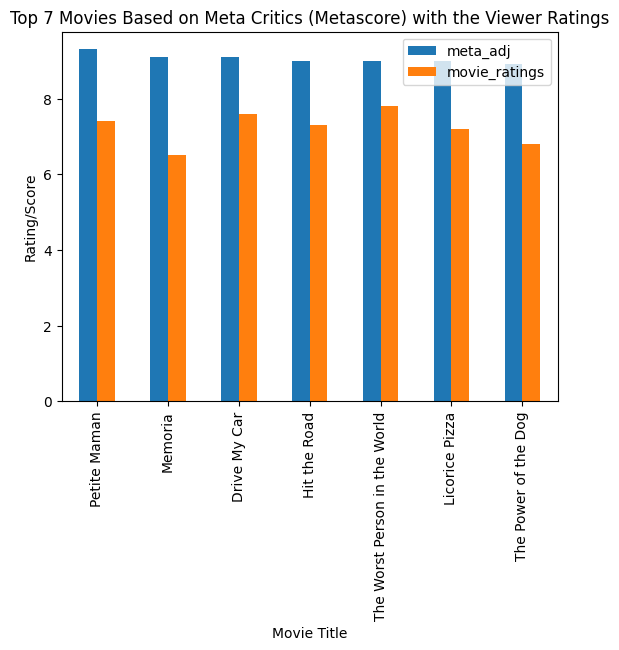

In [563]:
# to compare the top 7 movies based on adjusted metascore performance vs viewers ratings
bx=df.sort_values(by='metascore', ascending=False).head(7).loc[:,['meta_adj','movie_ratings']]
bx.plot.bar(title="Top 7 Movies Based on Meta Critics (Metascore) with the Viewer Ratings",
                  xlabel='Movie Title', ylabel='Rating/Score')

**Analysis** : The TOP 7 Movies with highest metascore are not necessarily that bad in terms or viewer ratings performances, although, as we can see, it's viewer ratings are constantly lower than the rescaled metascore. Meaning that the movie critics decision might not reflects the general publics opinion. 

<AxesSubplot:title={'center':'Distribution of Metascore'}, ylabel='Frequency'>

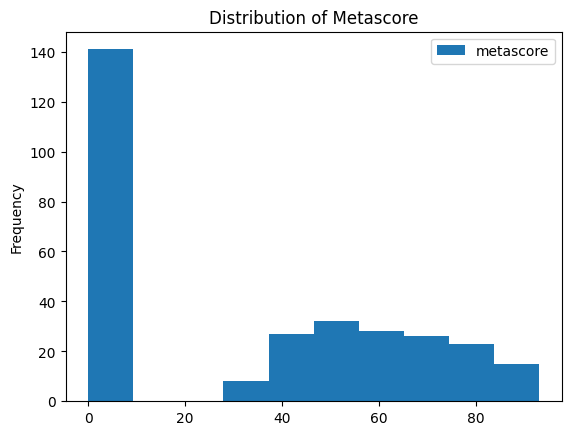

In [574]:
hist_meta=df.copy().reset_index().loc[:,['movie_title','metascore']]
hist_meta.plot.hist(title='Distribution of Metascore', xlabel='Metascore', ylabel='#of movies')

<AxesSubplot:title={'center':'Distribution of Viewer Votes'}, ylabel='Frequency'>

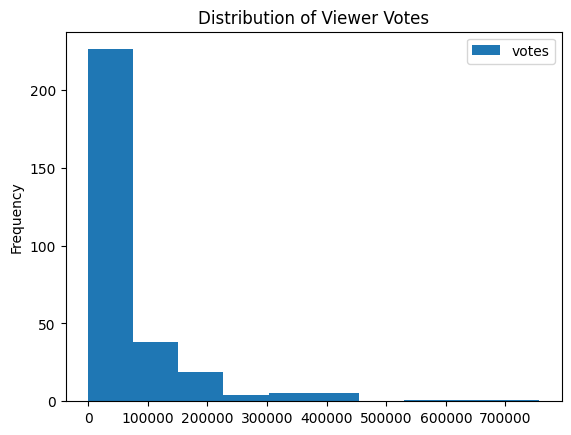

In [575]:
hist_votes=df.copy().reset_index().loc[:,['movie_title','votes']]
hist_votes.plot.hist(title='Distribution of Viewer Votes', xlabel='Viewer Votes', ylabel='#of movies')

In [607]:
hist_votes.describe()

,votes
count,300.000000
mean,65021.590000
std,100296.017414
min,225.000000
25%,9819.750000
50%,28127.500000
75%,74422.500000
max,756388.000000


**Analysis** : Unlike the viewer ratings distribution prior, the distribution of metascore and votes are extremely righ-skewed with mean far bigger than it's median with highly clustered data in the lower index values. The same behavior also shown by the histogram plot of the metascore, which further confirms the decision to get a popularity ranking based on **viewer ratings** instead of **votes** and **metascores**. 
